## CH06 Q03 

### (a) As we increase s from 0, the training RSS will:
In LASSO, setting s=0 forces all coefficients $\beta_j$=0, leading to a high training RSS (because the model fits a mean-only model with no predictors). As s increases, the constraint relaxes, allowing more coefficients to become nonzero and the model to fit the data better, thus reducing the training RSS.
- iv. Steadily decrease (since more flexibility in s generally reduces training error).
### (b) Repeat (a) for test RSS.
For the test RSS, the pattern can differ. Initially, as s increases, the model may improve, decreasing test RSS. However, if s grows too large, leading to overfitting, the test RSS may start increasing after reaching a minimum. This pattern typically forms a U-shaped curve for test RSS as a function of s.
- ii. Decrease initially, and then eventually start increasing in a U shape.
### (c) Repeat (a) for variance.
As s increases, the model complexity increases, allowing more parameters to vary freely, which increases the variance of the model.
- iv. Steadily increase.
### (d) Repeat (a) for (squared) bias.
With a very restrictive s (e.g., close to 0), the model has high bias, as it can't fit the data well. As s increases, the model bias decreases because the model can fit more details of the training data.
- iv. Steadily decrease.
### (e) Repeat (a) for the irreducible error.
The irreducible error is a property of the data and cannot be influenced by the model or the value of s.
- v. Remain constant.

## CH06 Q04

### (a) As we increase λ from 0, the training RSS will:
In ridge regression, setting λ=0 results in no penalty, making the model equivalent to ordinary least squares (OLS) and achieving the lowest possible training RSS. As λ increases, the penalty term forces the coefficients $\beta_j$ to shrink, leading to a decrease in the model’s flexibility and thus an increase in the training RSS.
- iii. Steadily increase.
### (b) Repeat (a) for test RSS.
For the test RSS, the effect is different. Initially, as λ increases, the test RSS may decrease because the regularization term reduces overfitting. However, as λ continues to increase, the model becomes too constrained, leading to underfitting, which causes the test RSS to start increasing. This behavior generally forms a U-shaped curve for the test RSS as a function of λ.
- ii. Decrease initially, and then eventually start increasing in a U shape.
### (c) Repeat (a) for variance.
As λ increases, the model complexity decreases due to the penalization, leading to lower variance (the model becomes more stable and less sensitive to fluctuations in the data).
- iv. Steadily decrease.
### (d) Repeat (a) for (squared) bias.
As λ increases, the bias of the model increases because the model becomes less flexible and less able to fit the training data accurately.
- iii. Steadily increase.
### (e) Repeat (a) for the irreducible error.
The irreducible error is a characteristic of the data and cannot be influenced by the model or the value of λ.
- v. Remain constant.

## CH06 Q06
## In this exercise, we will generate simulated data, and will then use  this data to perform forward and backward stepwise selection.
##  (a) Create a random number generator and use its normal() method to generate a predictor X of length n = 100, as well as a noise vector of length n = 100.


In [8]:
import numpy as np

# Set random seed for reproducibility
np.random.seed(0)

# Parameters
n = 100

# Generate predictor X and noise vector
X = np.random.normal(0, 1, n)
noise = np.random.normal(0, 1, n)

# Display the generated arrays
print("Predictor X:", X)
print("Noise vector:", noise)


Predictor X: [ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985   0.14404357  1.45427351
  0.76103773  0.12167502  0.44386323  0.33367433  1.49407907 -0.20515826
  0.3130677  -0.85409574 -2.55298982  0.6536186   0.8644362  -0.74216502
  2.26975462 -1.45436567  0.04575852 -0.18718385  1.53277921  1.46935877
  0.15494743  0.37816252 -0.88778575 -1.98079647 -0.34791215  0.15634897
  1.23029068  1.20237985 -0.38732682 -0.30230275 -1.04855297 -1.42001794
 -1.70627019  1.9507754  -0.50965218 -0.4380743  -1.25279536  0.77749036
 -1.61389785 -0.21274028 -0.89546656  0.3869025  -0.51080514 -1.18063218
 -0.02818223  0.42833187  0.06651722  0.3024719  -0.63432209 -0.36274117
 -0.67246045 -0.35955316 -0.81314628 -1.7262826   0.17742614 -0.40178094
 -1.63019835  0.46278226 -0.90729836  0.0519454   0.72909056  0.12898291
  1.13940068 -1.23482582  0.40234164 -0.68481009 -0.87079715 -0.57884966
 -0.31155253  0.05616534 -1.16514984  

 ## (b) Generate a response vector Y of length n = 100 according to the model
 ## $Y$ = $\beta_0$+ $\beta_1$ $X$+ $\beta_2$ $X^2$+ $\beta_3$ $X^3$+ $\epsilon$, where $\beta_0$, $\beta_1$, $\beta_2$, and $\beta_3$ are constants of your choice.

In [15]:
# Constants
beta_0 = 1
beta_1 = 0.5
beta_2 = -0.4
beta_3 = 0.1

# Generate response vector Y
Y = beta_0 + beta_1 * X + beta_2 * X**2 + beta_3 * X**3 + noise

# Display the generated response vector
print("Response vector Y:", Y)


Response vector Y: [ 3.06937664 -0.20532322 -0.07053117  2.20648983  0.01690826  1.97961634
  0.78611947  0.16735624  2.86696098  2.62529992  2.9315802   2.09478281
  0.33169947  2.96516068  0.88386717  1.92847322  2.13490172  0.7247113
  1.73447709  1.14106245 -4.1711489   0.08444531  1.49615129  1.69410071
  0.54892405 -1.03051363  0.58689775  2.74100084  1.85903252  1.59577193
  0.29832617  1.67653568 -0.50346298 -2.30516585  0.13756947  1.74521197
  1.77250876  0.98843438  1.13652372 -0.28353032 -1.57060396 -0.36353729
 -1.34776112  1.83058166  3.01118257  1.64027165 -1.36364415  2.31096358
 -2.58508937  0.41297906  0.09147706  2.85270823 -0.11785417 -1.13887899
  0.88713643  0.4851589   2.15815415  0.03747603 -0.65109838  0.32340392
 -0.04555276  2.69339583  1.22459912 -1.48205184 -0.14875592  1.57241547
 -2.311566   -0.38913565  1.33041656  1.34185     2.11153137  1.37677906
  2.05515825 -1.06664203  0.10868952  1.11948834 -0.60815478 -0.13239672
  0.34684115  1.04431773 -0.63777

##  Use forward stepwise selection in order to select a model containing the predictors $X$, $X^2$,..., $X^{10}$. What is the model obtained according to $C_p$? Report the coefficients of the model obtained.. What is the model obtained according to $C_p$? Report the coefficients of the model obtained.

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector

X_poly = np.column_stack([X**i for i in range(1, 11)])

model = LinearRegression()
sfs = SequentialFeatureSelector(model, n_features_to_select="auto", direction="forward", scoring="neg_mean_squared_error", cv=5)
sfs.fit(X_poly, Y)

selected_features_forward = sfs.get_support()

model.fit(X_poly[:, selected_features_forward], Y)
coefficients = model.coef_
intercept = model.intercept_

print("Selected features (forward):", selected_features_forward)
print("Intercept:", intercept)
print("Coefficients:", coefficients)

Selected features (forward): [ True  True False  True False False  True False  True False]
Intercept: 1.2159224046429746
Coefficients: [ 0.74763293 -0.62597443  0.02733454  0.0132682  -0.00194569]


##  (d) Repeat (c), using backwards stepwise selection. How does your answer compare to the results in (c)?

In [20]:
sfs_backward = SequentialFeatureSelector(model, n_features_to_select="auto", direction="backward", scoring="neg_mean_squared_error", cv=5)
sfs_backward.fit(X_poly, Y)

selected_features_backward = sfs_backward.get_support()

model.fit(X_poly[:, selected_features_backward], Y)
coefficients_backward = model.coef_
intercept_backward = model.intercept_

print("Selected features (backward):", selected_features_backward)
print("Intercept (backward):", intercept_backward)
print("Coefficients (backward):", coefficients_backward)

print("\nTwo methods choose different features for the model.")

Selected features (backward): [False  True  True  True  True False False False  True False]
Intercept (backward): 1.2647143863751253
Coefficients (backward): [-0.79813045  0.97597157  0.08896082 -0.23635425  0.00290142]

Two methods choose different features for the model.


## (e) Now fit a lasso model to the simulated data, again using $X$, $X^2$,..., $X^{10}$0 as predictors. Use cross-validation to select the optiml 
 value o$\lambda$f . Create plots of the cross-validation error as a functi 
 $\lambda$of . Report the resulting coefficient estimates, and discuss  e
 results obtained.

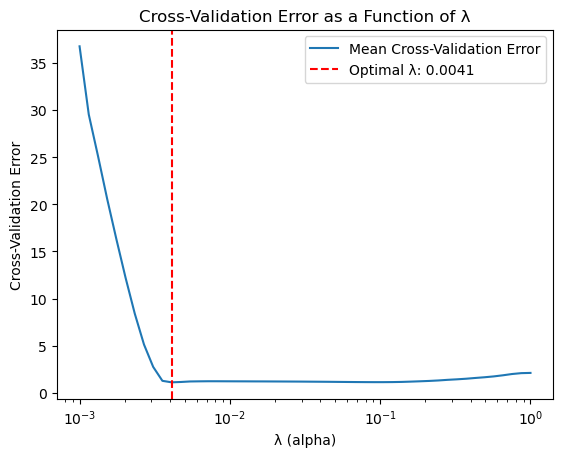

Optimal λ (alpha): 0.004094915062380427
Lasso Coefficients: [ 0.39977063 -0.68961194  0.92290539  0.22129538 -0.2343276   0.
 -0.24351539 -0.         -0.         -0.05936845]


In [35]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Generate polynomial features up to X^10
poly = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly.fit_transform(X)

# Standardize features
scaler = StandardScaler()
X_poly = scaler.fit_transform(X_poly)

# Fit Lasso model with cross-validation to find optimal alpha
lasso_cv = LassoCV(alphas=np.logspace(-3, 0, 50), cv=5, max_iter=50000, tol=1e-2, random_state=0)
lasso_cv.fit(X_poly, Y)

# Plot mean cross-validation error as a function of lambda
plt.plot(lasso_cv.alphas_, lasso_cv.mse_path_.mean(axis=1), label="Mean Cross-Validation Error")
plt.xscale("log")
plt.xlabel("λ (alpha)")
plt.ylabel("Cross-Validation Error")
plt.title("Cross-Validation Error as a Function of λ")
plt.axvline(lasso_cv.alpha_, color="red", linestyle="--", label=f"Optimal λ: {lasso_cv.alpha_:.4f}")
plt.legend()
plt.show()

# Output the optimal lambda and the coefficients of the fitted model
lasso_coefficients = lasso_cv.coef_
print("Optimal λ (alpha):", lasso_cv.alpha_)
print("Lasso Coefficients:", lasso_coefficients)


## (f) Now generate a response vector Y according to the model
## $Y$ = $\beta_0$+ $\beta_7$ $X^7$ + $\epsilon$ , and perform forward stepwise selection and the lasso. Discuss the results obtained.

Forward Stepwise Selection selected features: ['X^1', 'X^2', 'X^3', 'X^4', 'X^7']


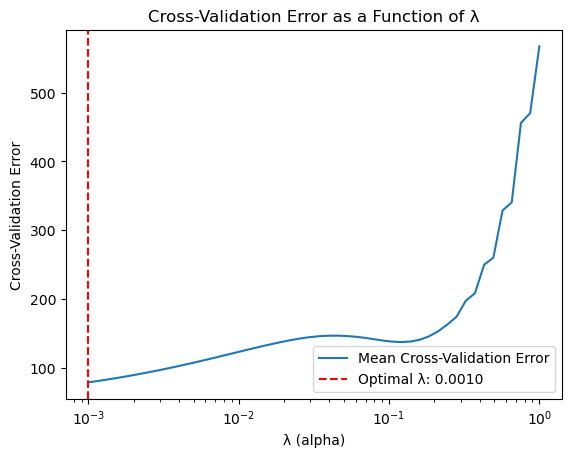

Optimal λ (alpha): 0.001
Lasso Coefficients: [-0.91918312  3.30069956 -8.13960286 -3.51234748 35.40222173 -5.95443282
 25.65160289  1.93303655 16.82617896  4.83634423]


In [38]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

beta_0, beta_7 = 1, 0.8  # Choose constants for the model
Y = beta_0 + beta_7 * X.flatten()**7 + noise

# Generate polynomial features up to X^10
poly = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly.fit_transform(X)

# Standardize features for Lasso
scaler = StandardScaler()
X_poly_standardized = scaler.fit_transform(X_poly)

# Perform forward stepwise selection
linear_model = LinearRegression()
sfs = SequentialFeatureSelector(linear_model, n_features_to_select="auto", direction="forward", scoring="neg_mean_squared_error")
sfs.fit(X_poly, Y)
selected_features = sfs.get_support(indices=True)
selected_feature_names = [f"X^{i+1}" for i in selected_features]
print("Forward Stepwise Selection selected features:", selected_feature_names)

# Fit Lasso with cross-validation
lasso_cv = LassoCV(alphas=np.logspace(-3, 0, 50), cv=5, max_iter=50000, tol=1e-2, random_state=0)
lasso_cv.fit(X_poly_standardized, Y)

# Plot mean cross-validation error as a function of lambda
plt.plot(lasso_cv.alphas_, lasso_cv.mse_path_.mean(axis=1), label="Mean Cross-Validation Error")
plt.xscale("log")
plt.xlabel("λ (alpha)")
plt.ylabel("Cross-Validation Error")
plt.title("Cross-Validation Error as a Function of λ")
plt.axvline(lasso_cv.alpha_, color="red", linestyle="--", label=f"Optimal λ: {lasso_cv.alpha_:.4f}")
plt.legend()
plt.show()

# Output the selected Lasso coefficients
lasso_coefficients = lasso_cv.coef_
print("Optimal λ (alpha):", lasso_cv.alpha_)
print("Lasso Coefficients:", lasso_coefficients)


## CH06 Q09
## In this exercise, we will predict the number of applications received using the other variables in the College data set.
## (a) Split the data set into a training set and a test set.

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('College.csv')  # Modify with your file path if needed
data = data.iloc[:, 1:]
data['Private'] = data['Private'].map({'Yes': 1, 'No': 0})
# Define the target variable (e.g., 'Applications') and features
target = 'Apps'  # Replace with the actual column name for applications
X = data.drop(columns=[target])  # Features
y = data[target]  # Target

# Split the dataset into training and test sets (80%-20% split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the sizes of the splits
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")


Training set size: (621, 17)
Test set size: (156, 17)


##  (b) Fit a linear model using least squares on the training set, and report the test error obtained.

In [20]:
# Importing necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE) on the test set
test_mse = mean_squared_error(y_test, y_pred)

# Report the test error
print(f"Test Mean Squared Error: {test_mse:.2f}")


Test Mean Squared Error: 1492443.38


##  (c) Fit a ridge regression model on the training set, with chosen by cross-validation. Report the test error obtained.

In [23]:
# Import necessary libraries
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error

# Define a range of alpha values for cross-validation
alpha_values = [0.1, 1.0, 10.0, 100.0, 1000.0]

# Initialize the RidgeCV model
ridge_model = RidgeCV(alphas=alpha_values, scoring='neg_mean_squared_error', cv=5)

# Fit the RidgeCV model to the training data
ridge_model.fit(X_train, y_train)

# Get the best alpha
best_alpha = ridge_model.alpha_
print(f"Optimal alpha chosen by cross-validation: {best_alpha}")

# Predict on the test set using the trained Ridge model
y_pred_ridge = ridge_model.predict(X_test)

# Calculate the test Mean Squared Error (MSE)
test_mse_ridge = mean_squared_error(y_test, y_pred_ridge)

# Report the test error
print(f"Test Mean Squared Error (Ridge Regression): {test_mse_ridge:.2f}")


Optimal alpha chosen by cross-validation: 10.0
Test Mean Squared Error (Ridge Regression): 1478572.81


##  (d) Fit a lasso model on the training set, with chosen by cross-validation. Report the test error obtained, along with the number of non-zero coefficient estimates.

In [27]:
# Import necessary libraries
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error
import numpy as np

# Define a range of alpha values for cross-validation
alpha_values = np.logspace(-3, 2, 100)  # 100 values from 0.001 to 100

# Initialize the LassoCV model
lasso_model = LassoCV(alphas=alpha_values, cv=5, random_state=42)

# Fit the LassoCV model to the training data
lasso_model.fit(X_train, y_train)

# Get the best alpha
best_alpha = lasso_model.alpha_
print(f"Optimal alpha chosen by cross-validation: {best_alpha}")

# Predict on the test set using the trained Lasso model
y_pred_lasso = lasso_model.predict(X_test)

# Calculate the test Mean Squared Error (MSE)
test_mse_lasso = mean_squared_error(y_test, y_pred_lasso)

# Count the number of non-zero coefficients
num_nonzero_coefs = np.sum(lasso_model.coef_ != 0)

# Report the test error and the number of non-zero coefficients
print(f"Test Mean Squared Error (Lasso Regression): {test_mse_lasso:.2f}")
print(f"Number of non-zero coefficients: {num_nonzero_coefs}")


Optimal alpha chosen by cross-validation: 7.742636826811269
Test Mean Squared Error (Lasso Regression): 1480422.07
Number of non-zero coefficients: 17


##  (e) Fit a PCR model on the training set, with M chosen by cross-validation. Report the test error obtained, along with the value of M selected by cross-validation.

In [30]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

# Perform PCA on the training data
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Initialize variables to track the best M and the lowest cross-validated error
best_m = 0
lowest_cv_error = float('inf')

# Iterate over possible numbers of principal components
for m in range(1, X_train_pca.shape[1] + 1):
    # Use the first m principal components
    X_train_pca_m = X_train_pca[:, :m]
    
    # Perform cross-validation with linear regression
    model = LinearRegression()
    cv_scores = cross_val_score(model, X_train_pca_m, y_train, cv=5, scoring='neg_mean_squared_error')
    
    # Calculate the mean cross-validated error
    mean_cv_error = -np.mean(cv_scores)
    
    # Update the best M if the current model is better
    if mean_cv_error < lowest_cv_error:
        best_m = m
        lowest_cv_error = mean_cv_error

# Train the final model using the best M
X_train_pca_best = X_train_pca[:, :best_m]
X_test_pca_best = X_test_pca[:, :best_m]

final_model = LinearRegression()
final_model.fit(X_train_pca_best, y_train)

# Predict on the test set
y_pred_pcr = final_model.predict(X_test_pca_best)

# Calculate the test error (Mean Squared Error)
test_mse_pcr = mean_squared_error(y_test, y_pred_pcr)

# Report the results
print(f"Optimal number of components (M) chosen by cross-validation: {best_m}")
print(f"Test Mean Squared Error (PCR): {test_mse_pcr:.2f}")


Optimal number of components (M) chosen by cross-validation: 17
Test Mean Squared Error (PCR): 1492443.38


##  (f) Fit a PLS model on the training set, with M chosen by cross-validation. Report the test error obtained, along with the value iof M selected by cross-validation

In [33]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize variables to track the best M and the lowest cross-validated error
best_m = 0
lowest_cv_error = float('inf')

# Iterate over possible numbers of components (1 to the minimum of feature count or sample count)
max_components = min(X_train.shape[1], X_train.shape[0])
for m in range(1, max_components + 1):
    # Initialize PLS model with m components
    pls = PLSRegression(n_components=m)
    
    # Perform cross-validation with negative mean squared error as scoring
    cv_scores = cross_val_score(pls, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    
    # Calculate the mean cross-validated error
    mean_cv_error = -np.mean(cv_scores)
    
    # Update the best M if the current model is better
    if mean_cv_error < lowest_cv_error:
        best_m = m
        lowest_cv_error = mean_cv_error

# Train the final PLS model using the best M
final_pls = PLSRegression(n_components=best_m)
final_pls.fit(X_train, y_train)

# Predict on the test set
y_pred_pls = final_pls.predict(X_test)

# Calculate the test error (Mean Squared Error)
test_mse_pls = mean_squared_error(y_test, y_pred_pls)

# Report the results
print(f"Optimal number of components (M) chosen by cross-validation: {best_m}")
print(f"Test Mean Squared Error (PLS): {test_mse_pls:.2f}")


Optimal number of components (M) chosen by cross-validation: 17
Test Mean Squared Error (PLS): 1492443.38


##  (g) Comment on the results obtained. How accurately can we predict the number of college applications received? Is there much difference among the test errors resulting from these five approaches?

### Prediction Accuracy: The models show a similar level of predictive performance, with modest improvements between Linear Regression, Ridge, and Lasso. The MSEs are still relatively large, suggesting that predicting the number of college applications remains a difficult problem, perhaps due to unaccounted-for features or high variability in the data.

### Effectiveness of Approaches: The methods that incorporate regularization (Ridge and Lasso) provided slight improvements, while dimensionality reduction methods (PCR and PLS) did not improve beyond the baseline. Ridge Regression slightly reduced the test error, but the improvement was not substantial enough to conclusively recommend one model over the others.

### Model Choice: If feature selection is important (such as for interpretability), Lasso might be the model of choice due to its ability to shrink irrelevant coefficients to zero. Otherwise, Ridge may be more suitable for handling multicollinearity without overly simplifying the model.